## Overview  
The below implementation of an sklearn pipeline is the combination of original work and a 'towards data science' article;[A Simple Example of Pipeline in Machine Learning with Scikit-learn](https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976)

## Problem Statement
The intent for this code is to serve as code-along/self-study reference material.

## Table of Contents  

* [Pipeline Theory](#theory)
* [Import Libraries](#import_libraries)
* [Import Data](#import_data)
* [Create DataFrame and Descriptive Metrics](#create_dataframe)
* [Data Preprocessing; check for nulls](#data_preprocessing)
* [Exploratory Data Analysis](#explore_data)
* [Construct Pipeline](#pipeline)
* [Splitting the data into training and testing sets](#split_data)
* [Tune Model Parameters with GridSearchCV](#grid)
* [Predictions from Gridsearch Model](#gs_predict)

<a class="anchor" id="theory"></a>
## Pipeline Theory

A pipeline will:
   * Sequentially apply a list of transforms and a final estimator. 
   * Intermediate steps of pipeline must implement fit and transform methods  
   * The final estimator only needs to implement fit

<a class="anchor" id="import_libraries"></a>
## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a class="anchor" id="import_data"></a>
## Import Data

In [33]:
df = pd.read_csv('wine.csv')

<a class="anchor" id="create_dataframe"></a>
## Create DataFrame and Descriptive Metrics

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<a class="anchor" id="data_preprocessing"></a>
## Data Preprocessing; check for nulls  

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<a class="anchor" id="explore_data"></a>
## Exploratory Data Analysis

<AxesSubplot:xlabel='quality', ylabel='count'>

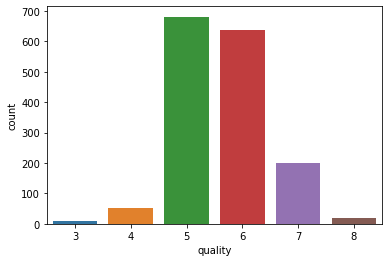

In [32]:
#note; target variable is unbalanced in dataset
sns.countplot(x='quality',data=df)

In [10]:
#create a correlation matrix, round to 2 decimal places
correlation_matrix = df.corr().round(2)
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
citric acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
free sulfur dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
total sulfur dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25


<AxesSubplot:>

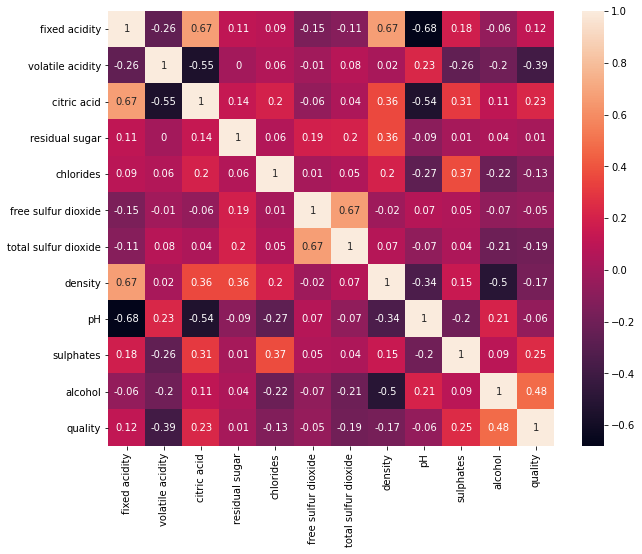

In [19]:
plt.figure(figsize=(10,8))
           
sns.heatmap(data=correlation_matrix,annot=True)

Text(0, 0.5, 'fixed acidity')

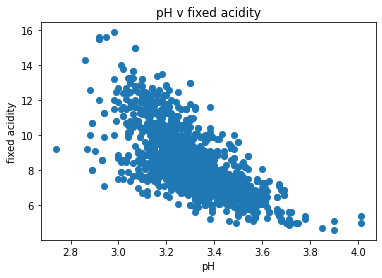

In [21]:
plt.scatter(x=df['pH'],y=df['fixed acidity'])

plt.title('pH v fixed acidity')
plt.xlabel('pH')
plt.ylabel('fixed acidity')

Text(0, 0.5, 'fixed acidity')

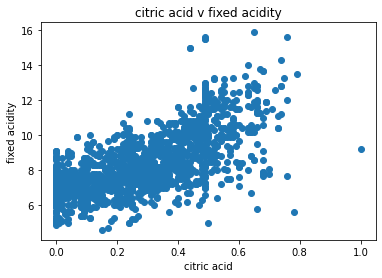

In [22]:
plt.scatter(x=df['citric acid'],y=df['fixed acidity'])

plt.title('citric acid v fixed acidity')
plt.xlabel('citric acid')
plt.ylabel('fixed acidity')

<a class="anchor" id="pipeline"></a>
## Construct Pipeline

Import tools that will be used by the pipeline; the tools/steps implemented will vary based on the data, and the objective of the project

In [29]:
#for this project we will standarize the data, and fit a Support Vector Model/Classifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

The Pipeline is constructed by specifying a list of steps to be executed in the provided order:

These steps are list of tuples consisting of a name, and an instance of the transformer/estimator.

In [30]:
steps = [('scaler', StandardScaler()), ('SVM', SVC())]

In [31]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps) # define the pipeline object.

<a class="anchor" id="split_data"></a>
## Splitting the data into training and testing sets

In [27]:
X=df.drop('quality',axis=1)
y=df['quality']

In [24]:
from sklearn.model_selection import train_test_split

In [34]:
#note; stratify the train/test splits as the target variables are unbalanced in the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

<a class="anchor" id="grid"></a>
## Tune Model Parameters with GridSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV

### NOTE: Must specify which 'pipeline step' the parameters in param_grid apply to, by declaring the step name followed by 2 underscores followed by the parameter name; ex SVM _ _ C, SVC _ _ gamma, etc.

In [40]:
param_grid = {'SVM__C': [0.1,1, 10, 100, 1000], 'SVM__gamma': [1,0.1,0.01,0.001,0.0001], 'SVM__kernel': ['rbf']} 

Create instance of GridSearchCV

In [41]:
#instantiate GridSearchCV with the PIPELINE and parameters
grid = GridSearchCV(pipeline,param_grid,refit=True,verbose=3)

Fit training data to instance of GridSearchCV

In [42]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ......SVM__C=0.1, SVM__gamma=1, SVM__kernel=rbf; total time=   0.1s
[CV 2/5] END ......SVM__C=0.1, SVM__gamma=1, SVM__kernel=rbf; total time=   0.1s
[CV 3/5] END ......SVM__C=0.1, SVM__gamma=1, SVM__kernel=rbf; total time=   0.1s
[CV 4/5] END ......SVM__C=0.1, SVM__gamma=1, SVM__kernel=rbf; total time=   0.1s
[CV 5/5] END ......SVM__C=0.1, SVM__gamma=1, SVM__kernel=rbf; total time=   0.1s
[CV 1/5] END ....SVM__C=0.1, SVM__gamma=0.1, SVM__kernel=rbf; total time=   0.0s
[CV 2/5] END ....SVM__C=0.1, SVM__gamma=0.1, SVM__kernel=rbf; total time=   0.0s
[CV 3/5] END ....SVM__C=0.1, SVM__gamma=0.1, SVM__kernel=rbf; total time=   0.0s
[CV 4/5] END ....SVM__C=0.1, SVM__gamma=0.1, SVM__kernel=rbf; total time=   0.0s
[CV 5/5] END ....SVM__C=0.1, SVM__gamma=0.1, SVM__kernel=rbf; total time=   0.0s
[CV 1/5] END ...SVM__C=0.1, SVM__gamma=0.01, SVM__kernel=rbf; total time=   0.1s
[CV 2/5] END ...SVM__C=0.1, SVM__gamma=0.01, SV

[CV 2/5] END .....SVM__C=1000, SVM__gamma=1, SVM__kernel=rbf; total time=   0.1s
[CV 3/5] END .....SVM__C=1000, SVM__gamma=1, SVM__kernel=rbf; total time=   0.1s
[CV 4/5] END .....SVM__C=1000, SVM__gamma=1, SVM__kernel=rbf; total time=   0.1s
[CV 5/5] END .....SVM__C=1000, SVM__gamma=1, SVM__kernel=rbf; total time=   0.1s
[CV 1/5] END ...SVM__C=1000, SVM__gamma=0.1, SVM__kernel=rbf; total time=   0.2s
[CV 2/5] END ...SVM__C=1000, SVM__gamma=0.1, SVM__kernel=rbf; total time=   0.3s
[CV 3/5] END ...SVM__C=1000, SVM__gamma=0.1, SVM__kernel=rbf; total time=   0.2s
[CV 4/5] END ...SVM__C=1000, SVM__gamma=0.1, SVM__kernel=rbf; total time=   0.3s
[CV 5/5] END ...SVM__C=1000, SVM__gamma=0.1, SVM__kernel=rbf; total time=   0.3s
[CV 1/5] END ..SVM__C=1000, SVM__gamma=0.01, SVM__kernel=rbf; total time=   0.3s
[CV 2/5] END ..SVM__C=1000, SVM__gamma=0.01, SVM__kernel=rbf; total time=   0.3s
[CV 3/5] END ..SVM__C=1000, SVM__gamma=0.01, SVM__kernel=rbf; total time=   0.3s
[CV 4/5] END ..SVM__C=1000, 

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVM', SVC())]),
             param_grid={'SVM__C': [0.1, 1, 10, 100, 1000],
                         'SVM__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'SVM__kernel': ['rbf']},
             verbose=3)

Retrieve the 'best' parameter settings; the settings that gave the best results on the hold out data.

In [43]:
grid.best_params_

{'SVM__C': 10, 'SVM__gamma': 1, 'SVM__kernel': 'rbf'}

In [46]:
print("score = %3.2f" %(grid.score(X_test,y_test)))

score = 0.68


<a class="anchor" id="gs_predict"></a>
## Predictions from GridSearchCV Model

In [47]:
grid_predictions = grid.predict(X_test)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print('Predictions from Model with Gridsearch parameters:')
print('\n')
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

Predictions from Model with Gridsearch parameters:


[[  0   0   1   1   0   0]
 [  0   0   6   5   0   0]
 [  0   1 104  31   0   0]
 [  0   0  28  96   4   0]
 [  0   0   8  15  16   1]
 [  0   0   0   1   1   1]]


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.71      0.76      0.73       136
           6       0.64      0.75      0.69       128
           7       0.76      0.40      0.52        40
           8       0.50      0.33      0.40         3

    accuracy                           0.68       320
   macro avg       0.44      0.37      0.39       320
weighted avg       0.66      0.68      0.66       320



c:\users\devin\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\devin\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\devin\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo